<a href="https://colab.research.google.com/github/annaprotsek/NM/blob/main/%D0%9B%D0%A013_%D0%9F%D1%80%D0%BE%D1%86%D0%B8%D0%BA_11%D0%B2_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Лабораторна робота 13.

#Метод Ейлера

Метод Ейлера :
x=1.8, y=2.6000
x=1.9, y=2.8718
x=2.0, y=3.1577
x=2.1, y=3.4565
x=2.2, y=3.7664
x=2.3, y=4.0858
x=2.4, y=4.4125
x=2.5, y=4.7445
x=2.6, y=5.0797
x=2.7, y=5.4161


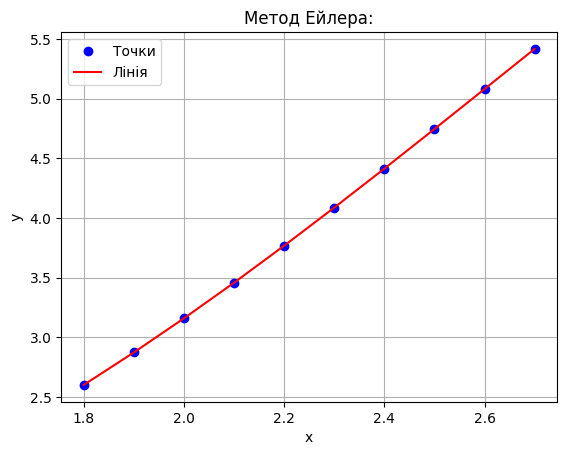

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def f(x, y):
    return x + np.sin(y / np.sqrt(5))
# Початкові дані
a, b = 1.8, 2.8
h = 0.1
y0 = 2.6

# Кількість кроків
n = int((b - a) / h)

# Масиви
x = np.array([a + i*h for i in range(n + 1)])
y = np.zeros(n + 1)
y[0] = y0

# Метод Ейлера
for i in range(n):
    y[i + 1] = y[i] + h * f(x[i], y[i])

# Округлення значень
y_rounded = np.around(y, 4)

# Вивід значень
print("Метод Ейлера :")
for i in range(n + 1):
    print(f"x={x[i]:.1f}, y={y_rounded[i]:.4f}")

# Побудова графіка
plt.plot(x, y, "o", color="blue", label="Точки")
plt.plot(x, y, "-", color="red", label="Лінія")
plt.grid()
plt.xlabel("x")
plt.ylabel("y")
plt.title("Метод Ейлера:")
plt.legend()
plt.show()




In [8]:
#Додати перевірку odeint для першого завдання
import numpy as np
# *** Доданий імпорт ***
from scipy.integrate import odeint

def f_odeint(y, x):
    # f(x, y) = x + sin(y / sqrt(5))
    return x + np.sin(y / np.sqrt(5))

# Початкові дані
a, b = 1.8, 2.8
h = 0.1
y0 = 2.6
n = int((b - a) / h)

# Масив x для оцінки
x = np.array([a + i*h for i in range(n + 1)])

# Розв'язання ODE
y_odeint = odeint(f_odeint, y0, x)
y_odeint = y_odeint.flatten()
y_odeint_rounded = np.around(y_odeint, 4)

print("Перевірка odeint:")
for i in range(len(x)):
    print(f"x={x[i]:.1f}, y={y_odeint_rounded[i]:.4f}")


Перевірка odeint:
x=1.8, y=2.6000
x=1.9, y=2.8790
x=2.0, y=3.1716
x=2.1, y=3.4761
x=2.2, y=3.7909
x=2.3, y=4.1139
x=2.4, y=4.4430
x=2.5, y=4.7761
x=2.6, y=5.1113
x=2.7, y=5.4466


In [14]:
#додати перевірку solve_ivp для перешого завдання
import numpy as np
from scipy.integrate import solve_ivp # Додано імпорт!

def f_solve_ivp(x, y):
    # f(x, y) = x + sin(y / sqrt(5))
    return x + np.sin(y / np.sqrt(5))

# Початкові дані
a, b = 1.8, 2.8
h = 0.1
y0 = 2.6
n = int((b - a) / h)
x = np.array([a + i*h for i in range(n + 1)])

sol = solve_ivp(f_solve_ivp, [a, b], [y0], t_eval=x)
y_solve = sol.y[0]
y_solve_rounded = np.around(y_solve, 4)

print("\nПеревірка solve_ivp:")
for i in range(len(x)):
    print(f"x={x[i]:.1f}, y={y_solve_rounded[i]:.4f}")


Перевірка solve_ivp:
x=1.8, y=2.6000
x=1.9, y=2.8790
x=2.0, y=3.1717
x=2.1, y=3.4765
x=2.2, y=3.7913
x=2.3, y=4.1141
x=2.4, y=4.4429
x=2.5, y=4.7758
x=2.6, y=5.1109
x=2.7, y=5.4464


#Метод Ейлера-Коші

Метод Ейлера-Коші:
x=1.8, y=2.6000
x=1.9, y=2.8789
x=2.0, y=3.1713
x=2.1, y=3.4757
x=2.2, y=3.7903
x=2.3, y=4.1131
x=2.4, y=4.4421
x=2.5, y=4.7751
x=2.6, y=5.1101
x=2.7, y=5.4453


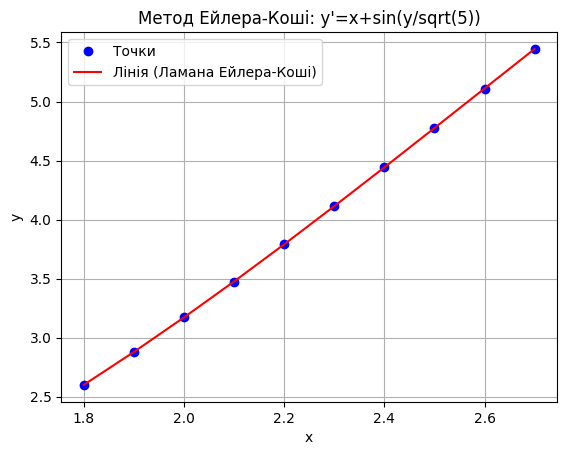

In [15]:
import numpy as np
import matplotlib.pyplot as plt

def f(x, y):
    # f(x, y) = x + sin(y / sqrt(5))
    return x + np.sin(y / np.sqrt(5)) # Виправлено math.sin на np.sin

# Початкові дані
a, b = 1.8, 2.8
h = 0.1
y0 = 2.6

n = int((b - a) / h)
x = np.array([a + i*h for i in range(n+1)])
y = np.zeros(n+1)
y[0] = y0

# Метод Ейлера-Коші
for i in range(n):
    k1 = f(x[i], y[i])              # f(x_i, y_i)
    y_tent = y[i] + h * k1          # Прогноз y_{i+1}^*
    k2 = f(x[i+1], y_tent)          # f(x_{i+1}, y_{i+1}^*)
    y[i+1] = y[i] + (h/2)*(k1 + k2) # Корекція y_{i+1}

# Округлення значень з точністю до 0.0001
y_rounded = np.around(y, 4)

print("Метод Ейлера-Коші:")
for i in range(n+1):
    print(f"x={x[i]:.1f}, y={y_rounded[i]:.4f}")

# Побудова графіка
plt.plot(x, y, "o", color="blue", label="Точки")
plt.plot(x, y, "-", color="red", label="Лінія (Ламана Ейлера-Коші)")
plt.grid()
plt.xlabel("x")
plt.ylabel("y")
plt.title("Метод Ейлера-Коші: y'=x+sin(y/sqrt(5))")
plt.legend()
plt.show()

#Розв’язок диф. Рівняння за допомогою scipy.integrate import odeint

x= [1.8 1.9 2.  2.1 2.2 2.3 2.4 2.5 2.6 2.7]
y= [2.6    2.879  3.1716 3.4761 3.7909 4.1139 4.443  4.7761 5.1113 5.4466]


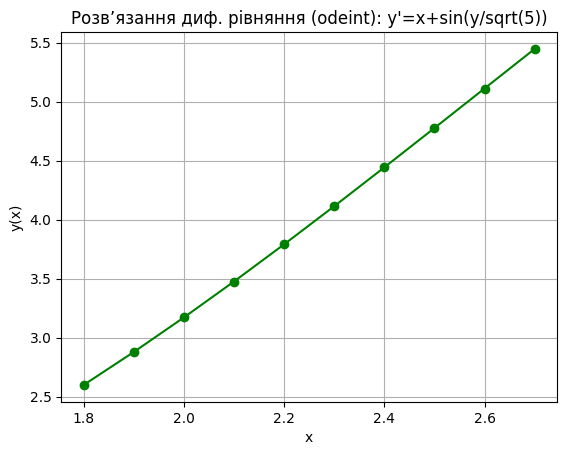

In [16]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

# Функція, що повертає dy/dx
def model(y, x):
     # f(x, y) = x + sin(y / sqrt(5))
     return x + np.sin(y / np.sqrt(5))

# Початкова умова
y0 = 2.6
a, b = 1.8, 2.8
h = 0.1
n = int((b - a) / h)

# Значення x
x = np.array([a + i*h for i in range(n + 1)]) # Коректний масив x

# Розв'язання ODE
y = odeint(model, y0, x)
y_rounded = np.around(y.flatten(), 4)

# Виведення результатів
print('x=', x)
print('y=', y_rounded)

# Побудова графіка результатів
plt.plot(x, y, marker='o', color='green')
plt.xlabel('x')
plt.ylabel('y(x)')
plt.title('Розв’язання диф. рівняння (odeint): y\'=x+sin(y/sqrt(5))')
plt.grid()
plt.show()

#Використання scipy.integrate.solve_ivp
Функція solve_ivp є більш сучасним і гнучким способом розв'язання ODE, ніж odeint. Вона також дозволяє використовувати різні методи інтегрування.

x= [1.8 1.9 2.  2.1 2.2 2.3 2.4 2.5 2.6 2.7]
y= [2.6    2.879  3.1717 3.4765 3.7913 4.1141 4.4429 4.7758 5.1109 5.4464]


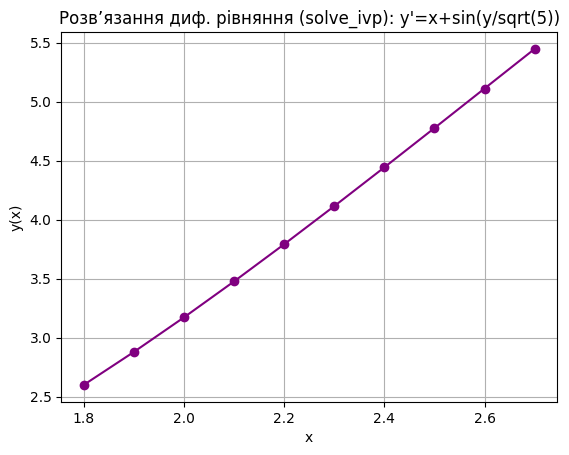

In [17]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

# Функція, що повертає dy/dx
def model(x, y):
    # f(x, y) = x + sin(y / sqrt(5))
    return x + np.sin(y / np.sqrt(5))

# Початкова умова
y0 = [2.6]
a, b = 1.8, 2.8
h = 0.1
n = int((b - a) / h)

# Значення x
x = np.array([a + i*h for i in range(n + 1)]) # Коректний масив x

# Розв'язання ODE
sol = solve_ivp(model, [a, b], y0, t_eval=x)

# Виведення результатів
print('x=', sol.t)
print('y=', np.around(sol.y[0], 4))

# Побудова графіка результатів
plt.plot(sol.t, sol.y[0], marker='o', color='purple')
plt.xlabel('x')
plt.ylabel('y(x)')
plt.title('Розв’язання диф. рівняння (solve_ivp): y\'=x+sin(y/sqrt(5))')
plt.grid()
plt.show()